In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from mpl_toolkits.mplot3d.axes3d import Axes3D

sns.set()

## Load Dataset <a id='load_dataset'></a>

In [2]:
data_frame = pd.read_csv('data/standscaler_pca_dataset.csv', index_col='patient_id')

data_frame.head()

,0,1,2,3,4,5,6,7,8
patient_id,,,,,,,,,
30,-2.478791,2.649604,0.488594,0.419761,-0.031517,-0.511156,0.071723,0.128733,-0.030674
31,2.116902,1.004163,-1.853525,-0.991107,-0.434996,-0.208806,-0.123282,0.020825,0.017553
32,-0.210183,1.198085,1.115644,-1.703688,-1.299281,-0.615108,0.088660,0.000525,0.014903
33,2.800917,-0.539468,1.120618,0.278740,1.013441,0.358727,-0.006748,0.139920,0.001666
34,-0.898801,1.077639,1.435869,1.271747,1.475563,0.585640,-0.116957,-0.093494,-0.019865


# Aglomerative Cluster <a id='aglom'></a>

## Aglomerative with complete linkage

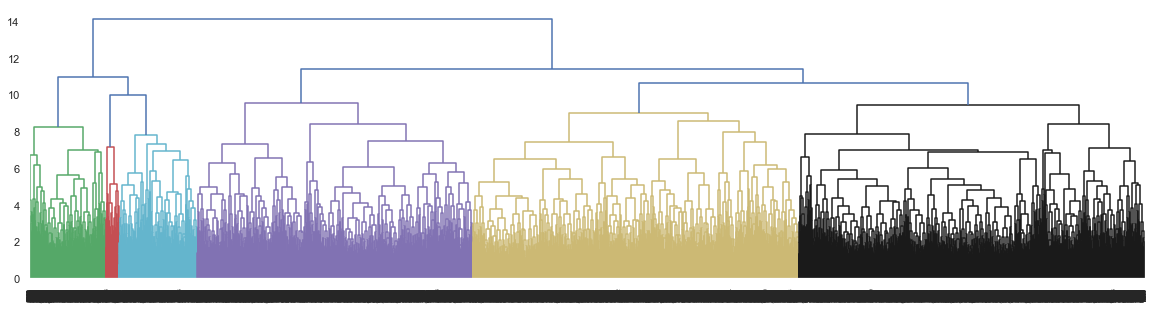

In [3]:
comp_linkage = linkage(data_frame.iloc[:,0:17], 'complete')
plt.figure(figsize=(20,5))
dn = dendrogram(comp_linkage)#, color_threshold=16.25)

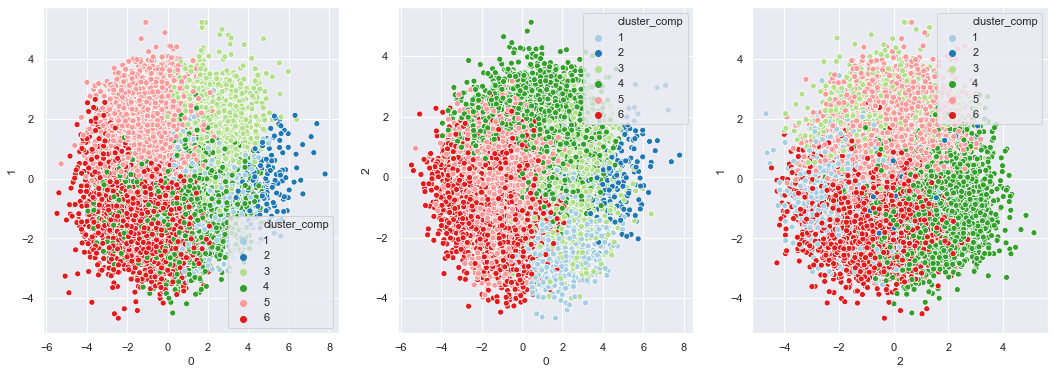

In [7]:
k = 6
clusters = fcluster(comp_linkage, k, criterion='maxclust')
data_frame['cluster_comp'] = clusters
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18,6))
_ = sns.scatterplot('0','1', data=data_frame, hue='cluster_comp', palette='Paired', ax=axes[0])
_ = sns.scatterplot('0','2', data=data_frame, hue='cluster_comp', palette='Paired', ax=axes[1])
_ = sns.scatterplot('2','1', data=data_frame, hue='cluster_comp', palette='Paired', ax=axes[2])